## ⌛️Assignment-3 Lab Submission ⌛️
### ✏️Submitted by 
> Rahul Patil
> 20083299
> 26th April 2019
### ✏️Professor  
> Bernard Butler

### ✏️Introduction
> A sample data-set related to Online Retail is to be fetched from a remote repository. After cleaning, organising the data in the relevant formats, respective Assosciate Rule Mining & a Recommender System has to be generated from the data-set.This assignment involves usage of algorithms like Aprori and Collaborative & Content-Based filtering techniques.


## Association Analysis

 >  🎯Let's start by importing the standard libraries which we are going to use througout the notebook.


In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import requests, os
import xlrd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
sns.set_context("paper")

 > 🎯 Since the standard libraries have been decalred, let's fetch the data either remotely or from the local directory



In [2]:
#Declare the variables
remote_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx'
local_file = 'Online Retail.xlsx'

#Fetch the remote copy if local file doesn't exist
if not os.path.isfile(local_file):
    r = requests.get(remote_url)
    with open(local_file, 'wb') as f:
     f.write(r.content)
if (local_file):
  df = pd.read_excel(local_file)
else:
  df = pd.read_csv(local_file)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


 > 🎯 After examining the data manually, we need to perform cleaning up on the data as there are gargabe values we need to get rid off. For instance, some invoice numbers start with "C". Some data don't have an invoice number at all. 




In [3]:
#Stripping white-space off the description column because of my Libre office issue as it adds extra spaces.
df['Description'] = df['Description'].str.strip()
df.dropna(axis=0, subset=['InvoiceNo'], inplace=True)
df['InvoiceNo'] = df['InvoiceNo'].astype('str')
df = df[~df['InvoiceNo'].str.contains('C')]
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


> __Task 1.1: Select the transactions arising from the Country having 9042 records in the dataframe and convert them to the OneHotEncoded form, where each column has (0,1) values representing the (absence,presence) of that product in a given basket, where each basket (row) is labeled by its InvoiceNo.

> ### ✏️ Solution



 > 🎯 First we need to find a country having 9042 records in the dataframe.




In [4]:
group_by_country = df.groupby('Country').size()
group_by_country

Country
Australia                 1185
Austria                    398
Bahrain                     18
Belgium                   2031
Brazil                      32
Canada                     151
Channel Islands            748
Cyprus                     614
Czech Republic              25
Denmark                    380
EIRE                      7894
European Community          60
Finland                    685
France                    8408
Germany                   9042
Greece                     145
Hong Kong                  284
Iceland                    182
Israel                     295
Italy                      758
Japan                      321
Lebanon                     45
Lithuania                   35
Malta                      112
Netherlands               2363
Norway                    1072
Poland                     330
Portugal                  1501
RSA                         58
Saudi Arabia                 9
Singapore                  222
Spain                     2485


 > 🎯 Secondly we need to convert them to the OneHotEncoded form.





In [5]:
basket_frame = (df[df['Country'] =="Germany"]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))
basket_frame.head(10)

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE SKULLS,...,YULETIDE IMAGES GIFT WRAP SET,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC BOX SIGN HOME,ZINC FOLKART SLEIGH BELLS,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536527,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536840,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536861,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536967,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536983,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537197,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537198,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537201,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537212,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


 > 🎯 As can be seen from the dataframe, the positive numbers have a frequency which needs to be standardized. In this setp, we set any positive numbers to 1 rather than a frequency count and convert all the decimals to the positive zero.






In [6]:
def convert_data(data):
    if data <= 0:
        return 0
    if data >= 1:
        return 1
basket_standard_data = basket_frame.applymap(convert_data)
basket_standard_data.head(10)

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE SKULLS,...,YULETIDE IMAGES GIFT WRAP SET,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC BOX SIGN HOME,ZINC FOLKART SLEIGH BELLS,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536527,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536840,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536861,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536967,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536983,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537197,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537198,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537201,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537212,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


> __Task 1.2__: Use mlxtend's `apriori` function to find the frequent itemsets where the minimum support threshold is set to 0.02. Hence derive the association rules where the minimum lift threshold is 1.
> ### ✏️ Solution



 > 🎯 Now that our data is in the required format, we can go ahead and find frequest item sets where the minimum support threshold is set to 0.02.



In [7]:
item_set_frequent = apriori(basket_standard_data, min_support=0.02, use_colnames=True).sort_values(by='support',ascending=False)
item_set_frequent

,support,itemsets
138,0.818381,(POSTAGE)
179,0.245077,(ROUND SNACK BOXES SET OF4 WOODLAND)
536,0.225383,"(ROUND SNACK BOXES SET OF4 WOODLAND, POSTAGE)"
177,0.157549,(ROUND SNACK BOXES SET OF 4 FRUITS)
534,0.150985,"(ROUND SNACK BOXES SET OF 4 FRUITS, POSTAGE)"
137,0.137856,(PLASTERS IN TIN WOODLAND ANIMALS)
166,0.137856,(REGENCY CAKESTAND 3 TIER)
634,0.131291,"(ROUND SNACK BOXES SET OF 4 FRUITS, ROUND SNAC..."
249,0.126915,(WOODLAND CHARLOTTE BAG)
843,0.124726,"(ROUND SNACK BOXES SET OF 4 FRUITS, ROUND SNAC..."


 > 🎯 Additionally, let's visualize  item support – itemsets frequency plots




 > 🎯 Deriving the association rules where the minimum lift threshold is 1.

In [8]:
generated_rules = association_rules(item_set_frequent, metric="lift", min_threshold=1)
generated_rules.head()


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ROUND SNACK BOXES SET OF4 WOODLAND),(POSTAGE),0.245077,0.818381,0.225383,0.919643,1.123735,0.024817,2.260151
1,(POSTAGE),(ROUND SNACK BOXES SET OF4 WOODLAND),0.818381,0.245077,0.225383,0.275401,1.123735,0.024817,1.041850
2,(ROUND SNACK BOXES SET OF 4 FRUITS),(POSTAGE),0.157549,0.818381,0.150985,0.958333,1.171012,0.022049,4.358862
3,(POSTAGE),(ROUND SNACK BOXES SET OF 4 FRUITS),0.818381,0.157549,0.150985,0.184492,1.171012,0.022049,1.033038
4,(ROUND SNACK BOXES SET OF 4 FRUITS),(ROUND SNACK BOXES SET OF4 WOODLAND),0.157549,0.245077,0.131291,0.833333,3.400298,0.092679,4.529540


In [9]:
# get stats on objective measures
generated_rules[["support","confidence", "lift"]].describe()

,support,confidence,lift
count,2438.000000,2438.000000,2438.000000
mean,0.029518,0.424202,4.391063
std,0.013710,0.303142,4.796171
min,0.021882,0.026738,1.003724
25%,0.021882,0.166667,1.221925
50%,0.026258,0.370370,2.746648
75%,0.030635,0.666667,4.802269
max,0.225383,1.000000,38.083333


> __Task 1.3__: Defining the _rule length_ to be the total number of products in the rule, plot the distribution of association rules by rule length and explain why the distribution looks like it does. Choosing the _longest_ rules, find the most attractive rule for use when recommending a (set of) products to a customer. Explain why reversing the rule might not be as effective.
> ### ✏️ Solution





In [10]:
# add new columnn storing the rule length
generated_rules["rule_length"] = generated_rules.apply(lambda row: len(row["antecedents"])+len(row["consequents"]), axis=1)

#displaying the rule_length
generated_rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,rule_length
0,(ROUND SNACK BOXES SET OF4 WOODLAND),(POSTAGE),0.245077,0.818381,0.225383,0.919643,1.123735,0.024817,2.260151,2
1,(POSTAGE),(ROUND SNACK BOXES SET OF4 WOODLAND),0.818381,0.245077,0.225383,0.275401,1.123735,0.024817,1.041850,2
2,(ROUND SNACK BOXES SET OF 4 FRUITS),(POSTAGE),0.157549,0.818381,0.150985,0.958333,1.171012,0.022049,4.358862,2
3,(POSTAGE),(ROUND SNACK BOXES SET OF 4 FRUITS),0.818381,0.157549,0.150985,0.184492,1.171012,0.022049,1.033038,2
4,(ROUND SNACK BOXES SET OF 4 FRUITS),(ROUND SNACK BOXES SET OF4 WOODLAND),0.157549,0.245077,0.131291,0.833333,3.400298,0.092679,4.529540,2


 > 🎯 Here I wasn't sure about plotting the rule distribution if it meant plotting it in a graph or just the table like above. Refering to the solved practical example, there wasn't any SNS/Matplotlab related graph for the rules so I didn't use them as well. The distribution is displayed along with the rule length column.

In [11]:
# get stats on rules groupt by rule length
generated_rules[["rule_length","support", "lift"]].groupby("rule_length").agg(['mean', 'count']).reset_index()

rule_length   support            lift      
                   mean count      mean count
0           2  0.033534   738  4.018823   738
1           3  0.028548  1208  4.515896  1208
2           4  0.025993   462  4.611013   462
3           5  0.024070    30  5.134311    30

In [12]:
# restrict analysis to rules of length 5 (longest rule length) and order rules by lift
generated_rules[generated_rules["rule_length"]==5].sort_values(by='lift',ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,rule_length
1655,"(ROUND SNACK BOXES SET OF 4 FRUITS, PLASTERS I...","(ROUND SNACK BOXES SET OF4 WOODLAND, PLASTERS ...",0.048140,0.050328,0.02407,0.500000,9.934783,0.021647,1.899344,5
1646,"(ROUND SNACK BOXES SET OF4 WOODLAND, PLASTERS ...","(ROUND SNACK BOXES SET OF 4 FRUITS, PLASTERS I...",0.050328,0.048140,0.02407,0.478261,9.934783,0.021647,1.824398,5
1647,"(ROUND SNACK BOXES SET OF 4 FRUITS, POSTAGE, P...","(ROUND SNACK BOXES SET OF4 WOODLAND, PLASTERS ...",0.045952,0.056893,0.02407,0.523810,9.206960,0.021456,1.980525,5
1654,"(ROUND SNACK BOXES SET OF4 WOODLAND, PLASTERS ...","(ROUND SNACK BOXES SET OF 4 FRUITS, POSTAGE, P...",0.056893,0.045952,0.02407,0.423077,9.206960,0.021456,1.653683,5
1657,"(ROUND SNACK BOXES SET OF 4 FRUITS, PLASTERS I...","(PLASTERS IN TIN WOODLAND ANIMALS, ROUND SNACK...",0.050328,0.065646,0.02407,0.478261,7.285507,0.020766,1.790846,5


 >  🎯 Comments :
 
 > As we can see the rule_length of 5 is the most effective while recommending a movie.



## Recommender Systems

### ✏️Introduction
> A sample data-set related to movies data is to be fetched from a remote repository. After cleaning, organising the data in the relevant formats, respective Recommender System has to be generated from the data-set.



 >  🎯Let's start by importing the standard libraries which we are going to use for analysing data & creating a recommender system..


In [13]:
import numpy as np
import requests, os

 >  🎯 In this step, we will download the movies data-set (a smaller version) and read it's contents from a zip file.



In [14]:
#declare initial constants
data_size = "ml-latest-small"
data_url = 'http://files.grouplens.org/datasets/movielens/'+data_size+'.zip'
data_file_name = ''+data_size+'.zip'

#check if file exists otherwise download
if not os.path.isfile(data_file_name):
  r = requests.get(data_url)
  with open(data_file_name, 'wb') as f:
    f.write(r.content)


 >  🎯 The downloaded file doesn't have any dat files so we directly read the CSV's and merge them into a single data-frame using movieId as an index.



> __Task 2.1__: Read the `users.dat`, `movies.dat` and `ratings.dat` data files into data frames.

> ### ✏️ Solution




In [15]:
df = pd.read_csv('ml-latest-small/ratings.csv', sep=',')
df.head()


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [16]:
movie_titles = pd.read_csv('ml-latest-small/movies.csv', sep=',')
movie_titles.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [17]:
movie_tags = pd.read_csv('ml-latest-small/tags.csv', sep=',')
movie_tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


 >  🎯 We've read the CSV's and now we merge the required data files into a single data-frame.



In [18]:
df = pd.merge(df,movie_titles)
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


 >  🎯 Since we have our data in place, let's do some exploratory analysis.

> __Task 2.2__: Generate the distribution of ratings (number of user-movie ratings, per rating value).


> ### ✏️ Solution





In [19]:
#Ratings Distribution
data = df['rating'].value_counts().sort_index(ascending=False)
data.head()

5.0    13211
4.5     8551
4.0    26818
3.5    13136
3.0    20047
Name: rating, dtype: int64

In [20]:
# Number of ratings per movie
data = df.groupby('title')['rating'].count().sort_values(ascending=False)
data.head()


title
Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Silence of the Lambs, The (1991)    279
Matrix, The (1999)                  278
Name: rating, dtype: int64

In [21]:
# Number of ratings per user
data = df.groupby('userId')['rating'].count().sort_index(ascending=False)
data.head()

userId
610    1302
609      37
608     831
607     187
606    1115
Name: rating, dtype: int64

In [22]:
#Number of per rating, per user
data = df.groupby('userId')['rating'].value_counts().sort_index(ascending=False)
data.head()

userId  rating
610     5.0       180
        4.5       148
        4.0       286
        3.5       315
        3.0       230
Name: rating, dtype: int64

>  🎯 To reduce the dimensionality of the data set, we will filter out rarely rated movies and rarely rating users becasue the data distribution as deduced above can be inaccurate while creating our modal.

In [23]:
#Applying threshold to movies
minMovieRatings = 100
filterMovies = df['movieId'].value_counts() > minMovieRatings
filterMovies = filterMovies[filterMovies].index.tolist()

#Applying threshold to users
minUserRatings = 100
filterUsers = df['userId'].value_counts() > minUserRatings
filterUsers = filterUsers[filterUsers].index.tolist()

df_new = df[(df['movieId'].isin(filterMovies)) & (df['userId'].isin(filterUsers))]


print('The original data size :\t{}'.format(df.shape))
print('The filetred data frame size :\t{}'.format(df_new.shape))

The original data size :	(100836, 6)
The filetred data frame size :	(13659, 6)


> 🎯 __Task 2.3__: Using the filtered ratings dataframe, count the ratings per User and plot this data in a histogram. You should do the same with the Movies and comment on the similarities and differences between the two distributions

> ### ✏️ Solution

>  🎯 Let's get a general idea about the data from our filtered data-frame

In [24]:
df_new.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
5,18,1,3.5,1455209816,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


> 🎯 Counting the rating per user and plotting it in a histogram

In [25]:
# Number of ratings per user
data = df_new.groupby('userId')['rating'].count().clip(upper=100)

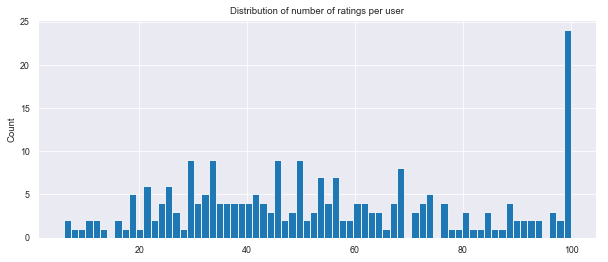

In [26]:
plt.figure(figsize=(10,4))
plt.ylabel('Count')
plt.title('Distribution of number of ratings per user')
data.hist(bins=70)

> 🎯 Counting the distribution with respect to movies and plotting it in a histogram

In [27]:
# Number of ratings per movie
data = df_new.groupby('movieId')['rating'].count().clip(upper=100)

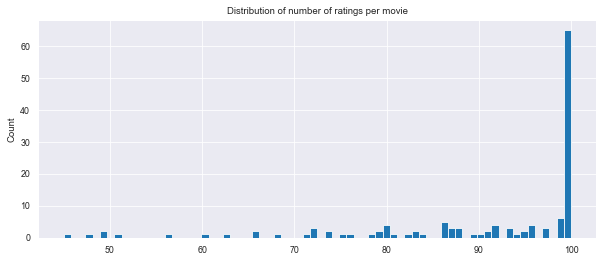

In [28]:
plt.figure(figsize=(10,4))
plt.ylabel('Count')
plt.title('Distribution of number of ratings per movie')
data.hist(bins=70)

In [29]:
df_new.groupby('userId')['rating'].count().reset_index().sort_values('rating', ascending=False)[:10]

,userId,rating
169,414,133
235,599,129
34,68,127
192,480,126
188,474,121
109,274,120
243,608,119
125,307,118
43,91,116
137,330,112


> 🎯 Comments :

> Although there are a few outlisers in the distribution, we can form a Gaussian distribution curve from the data. Most of the users in the data gave less than 5 ratings and not every user gave many ratings for all the movies. We can see above that the two plots share the same distribution. The number of ratings per movie and the. number of ratings per user are perioidic in nature. 

 > 🎯 __Task 2.4__: Repeat Task 2.3 above, but deriving the average ratings rather than their counts.
 
 > ### ✏️ Solution

In [30]:
# Number of average  ratings per user
data = df_new.groupby('userId')['rating'].mean().clip(upper=100)

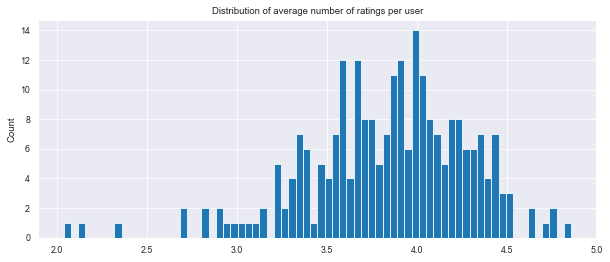

In [31]:
plt.figure(figsize=(10,4))
plt.ylabel('Count')
plt.title('Distribution of average number of ratings per user')
data.hist(bins=70)

In [32]:
# Number of average  ratings per movie
data = df_new.groupby('movieId')['rating'].mean().clip(upper=100)

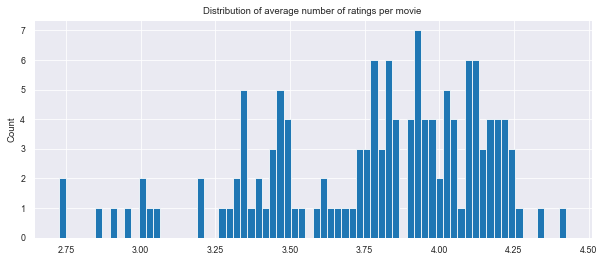

In [33]:
plt.figure(figsize=(10,4))
plt.ylabel('Count')
plt.title('Distribution of average number of ratings per movie')
data.hist(bins=70)

> 🎯 Comments :

> The data distribution as seen in the above plots have an uneven distribution unlike their counts. The average ratings given by the user to the associated movies differ drastically.

> 🎯 __Task 2.5__: Load the (filtered) movies ratings data from the dataframe we have been exploring into the preferred 3-column format used by the `scikit-suprise` package. Now benchmark the performance (in terms of RMS error, time to fit, and time to generate predictions for test data) of the `SVD()`, `SlopeOne()`, `NMF()`, `KNNBasic()` recommendation algorithms. Discuss the strengths and weaknesses of each algorithm, based on its benchmarked results.

> ### ✏️ Solution

 > 🎯 Loading the required libraries to use the recommendation algorithms

In [34]:
from surprise import Dataset, Reader
from surprise.model_selection import cross_validate
from surprise import SVD, SlopeOne, NMF, KNNBasic


 > 🎯 Loading the filtered movies ratings data into the 3 column format.


In [35]:
reader = Reader(rating_scale=(0, 9))
data = Dataset.load_from_df(df_new[['userId', 'movieId', 'rating']], reader)

 > 🎯 Benchmarking the performance (in terms of RMS error, time to fit, and time to generate predictions for test data) of the SVD(), SlopeOne(), NMF(), KNNBasic() recommendation algorithms.

In [36]:
results_benchmark = []
# Iterate over all algorithms at once
for algorithm in [SVD(), SlopeOne(), NMF(), KNNBasic()]:
    #  Run 5-fold cross-validation and print results.
    results = cross_validate(algorithm, data, measures=['RMSE','MAE'], cv=5, verbose=True)
    
    # Pushing algorithm names into results 
    data_hold = pd.DataFrame.from_dict(results).mean(axis=0)
    data_hold = data_hold.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    results_benchmark.append(data_hold)
    
#Setting results to the final dataframe
pd.DataFrame(results_benchmark).set_index('Algorithm').sort_values('test_rmse')  

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.7870  0.7946  0.8141  0.7990  0.8144  0.8018  0.0109  
MAE (testset)     0.5987  0.6066  0.6143  0.6100  0.6133  0.6086  0.0056  
Fit time          0.54    0.55    0.56    0.57    0.53    0.55    0.01    
Test time         0.01    0.01    0.01    0.01    0.01    0.01    0.00    
Evaluating RMSE, MAE of algorithm SlopeOne on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.7851  0.8014  0.8030  0.8102  0.8104  0.8020  0.0092  
MAE (testset)     0.5988  0.6035  0.6117  0.6081  0.6106  0.6065  0.0048  
Fit time          0.02    0.02    0.02    0.02    0.02    0.02    0.00    
Test time         0.11    0.11    0.11    0.11    0.11    0.11    0.00    
Evaluating RMSE, MAE of algorithm NMF on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (te

,test_rmse,test_mae,fit_time,test_time
Algorithm,,,,
SVD,0.801840,0.608596,0.549664,0.014207
SlopeOne,0.802008,0.606537,0.020412,0.110207
KNNBasic,0.837504,0.630771,0.014491,0.260913
NMF,0.867433,0.684474,0.525966,0.011853


 > 🎯 Comments :
 
 > SVD algorithm gives us the best RMSE hence we can use this algorithm to train/test our data. Also, SVD gives less errors for this data-set as compared to the other algorithms.